In [3]:
from Data_Core.experiment import *
%matplotlib notebook

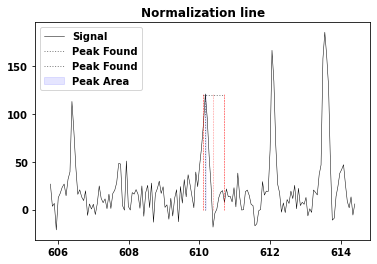

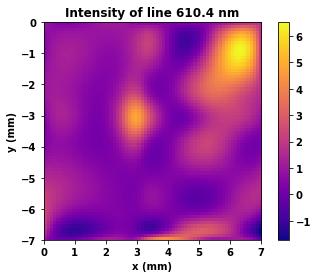

In [2]:
folder = r'D:/Data_LIBS/Map/'
current_experiment = experiment(folder)
for i in range(len(current_experiment.list_of_signals)):
    
    current_experiment.list_of_signals[i].remove_baseline()
    
x_values,y_values,map_values = current_experiment.make_map(0,specific_wavelength = 610.4,ratio_of_maximum = 0.99, Plotline=True)

In [9]:
print(x_values[0])
print(y_values[0])
print(map_values[0])

0.0
-7.0
0.9774123778666635
